# PROJECT OVERVIEW

James M. Irving

Flatiron Full Time Data Science 021119 Cohort


>- **Note: this notebook (`Capstone_Project_part1_time_series.ipynb`) is one of 3 project notebooks..** 
    1. **Tweet Preprocessing and NLP Classifications**
    2. Time Series Modeling of S&P 500
    3. Combined NLP + Time Series Modeling with S&P500 and Trump's Tweets

# 📚 ABSTRACT:

> Stock Market prices are notoriously difficult to model, but advances in machine learning algorithms in recent years provide renewed possibilities in accurately modeling market performance. One notable addition in modern machine learning is that of Natural Language Processing (NLP). For those modeling a specific stock, performing NLP feature extraction and analysis on the collection of news headlines, shareholder documents, or social media postings that mention the company can provide additional information about the human/social elements to predicting market behaviors. These insights could not be captured by historical price data and technical indicators alone.

> President Donald J. Trump is one of the most prolific users of social media, specifically Twitter, using it as a direct messaging channel to his followers, avoiding the traditional filtering and restriction that normally controls the public influence of the President of the United States. An additional element of the presidency that Trump has avoided is that of financial transparency and divesting of assets. Historically, this is done in order to avoid conflicts of interest, apparent or actual. The president is also known to target companies directly with his Tweets, advocating for specific changes/decisions by the company, or simply airing his greivances. This leads to the natural question, how much influence *does* President Trump exert over the financial markets? 

> To explore this question, we built multiple types of models attempting to answer this question, using the S&P500 as our market index. First, we built a classification model to predict the change in stock price 60 mins after the tweet. We trained Word2Vec embeddings on President Trump's tweets since his election, which we used as the embedding layer for LSTM and GRU neural networks. 

> We next build a baseline time series regression model, using historical price data alone to predict price by trading-hour. We then built upon this, adding several technical indicators of market performance as additional features. 
Finally, we combined the predicitons of our classification model, as well as several other metrics about the tweets (sentiment scores, # of retweets/favorites, upper-to-lowercase ratio,etc.) to see if combining all of these sources of information could explain even more of the variance in stock market prices. 



## Table of Contents Legend

- 📚: Info sections
- 🕹: Coding sections
    - 🎛: **yperparameters to tune**
    - 🏋️: fitting models
    - 🤔: New Things to Potentially Try 
- Use the Table of Contents view on the left sidebar to find the relevant sections (button looks like a bulleted list)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PROJECT-OVERVIEW" data-toc-modified-id="PROJECT-OVERVIEW-1">PROJECT OVERVIEW</a></span></li><li><span><a href="#📚-ABSTRACT:" data-toc-modified-id="📚-ABSTRACT:-2">📚 ABSTRACT:</a></span><ul class="toc-item"><li><span><a href="#Table-of-Contents-Legend" data-toc-modified-id="Table-of-Contents-Legend-2.1">Table of Contents Legend</a></span></li><li><span><a href="#📚-MAIN-QUESTION:" data-toc-modified-id="📚-MAIN-QUESTION:-2.2">📚 MAIN QUESTION:</a></span><ul class="toc-item"><li><span><a href="#REFERENCES-/-INSPIRATION:" data-toc-modified-id="REFERENCES-/-INSPIRATION:-2.2.1">REFERENCES / INSPIRATION:</a></span></li></ul></li><li><span><a href="#OVERVIEW-OF-DATA/FEATURES-USED-PER-MODEL" data-toc-modified-id="OVERVIEW-OF-DATA/FEATURES-USED-PER-MODEL-2.3">OVERVIEW OF DATA/FEATURES USED PER MODEL</a></span><ul class="toc-item"><li><span><a href="#FINAL-MODEL:-COMBINING-STOCK-MARKET-DATA,--NLP-CLASSIFICATION,-AND-OTHER-TWEET-METRICS" data-toc-modified-id="FINAL-MODEL:-COMBINING-STOCK-MARKET-DATA,--NLP-CLASSIFICATION,-AND-OTHER-TWEET-METRICS-2.3.1">FINAL MODEL: COMBINING STOCK MARKET DATA,  NLP CLASSIFICATION, AND OTHER TWEET METRICS</a></span></li></ul></li><li><span><a href="#OSEMN-FRAMEWORK" data-toc-modified-id="OSEMN-FRAMEWORK-2.4">OSEMN FRAMEWORK</a></span><ul class="toc-item"><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-2.4.1"><a href="#OBTAIN">OBTAIN</a></a></span></li><li><span><a href="#SCRUB" data-toc-modified-id="SCRUB-2.4.2"><a href="#SCRUB">SCRUB</a></a></span></li><li><span><a href="#EXPLORE-/-VISUALIZE" data-toc-modified-id="EXPLORE-/-VISUALIZE-2.4.3"><a href="#EXPLORE/VISUALIZE">EXPLORE / VISUALIZE</a></a></span></li><li><span><a href="#MODELING-(Initial)" data-toc-modified-id="MODELING-(Initial)-2.4.4"><a href="#INITIAL-MODELING">MODELING (Initial)</a></a></span></li><li><span><a href="#iNTERPRETATION" data-toc-modified-id="iNTERPRETATION-2.4.5">iNTERPRETATION</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3">OBTAIN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#📚-DATA-SOURCES:" data-toc-modified-id="📚-DATA-SOURCES:-3.0.1">📚 DATA SOURCES:</a></span></li></ul></li></ul></li><li><span><a href="#SCRUB" data-toc-modified-id="SCRUB-4">SCRUB</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Functions" data-toc-modified-id="Importing-Functions-4.0.1">Importing Functions</a></span></li></ul></li></ul></li><li><span><a href="#FORECASTING-STOCK-MARKET-PRICE" data-toc-modified-id="FORECASTING-STOCK-MARKET-PRICE-5">FORECASTING STOCK MARKET PRICE</a></span><ul class="toc-item"><li><span><a href="#Loading-&amp;-Processing-Stock-Data-(SCRUB)" data-toc-modified-id="Loading-&amp;-Processing-Stock-Data-(SCRUB)-5.1">Loading &amp; Processing Stock Data (SCRUB)</a></span></li><li><span><a href="#Load-in-raw-text-file-with-minute-resolutin-S&amp;P-500-prices" data-toc-modified-id="Load-in-raw-text-file-with-minute-resolutin-S&amp;P-500-prices-5.2">Load in raw text file with minute-resolutin S&amp;P 500 prices</a></span><ul class="toc-item"><li><span><a href="#NOTEs-TO-SELF-[06/19/21]" data-toc-modified-id="NOTEs-TO-SELF-[06/19/21]-5.2.1">NOTEs TO SELF [06/19/21]</a></span></li></ul></li></ul></li><li><span><a href="#Model-Type-1:-Using-Price-to-predict-Price" data-toc-modified-id="Model-Type-1:-Using-Price-to-predict-Price-6">Model Type 1: Using Price to predict Price</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-6.0.1">Train Test Split</a></span></li></ul></li><li><span><a href="#Model-1.1:-SARIMAX" data-toc-modified-id="Model-1.1:-SARIMAX-6.1">Model 1.1: SARIMAX</a></span><ul class="toc-item"><li><span><a href="#Pyramind-ARIMA-GridSearch" data-toc-modified-id="Pyramind-ARIMA-GridSearch-6.1.1">Pyramind ARIMA GridSearch</a></span></li></ul></li><li><span><a href="#Pyramind-ARIMA-GridSearch" data-toc-modified-id="Pyramind-ARIMA-GridSearch-6.2">Pyramind ARIMA GridSearch</a></span></li></ul></li><li><span><a href="#BOOKMARK-06/19" data-toc-modified-id="BOOKMARK-06/19-7">BOOKMARK 06/19</a></span><ul class="toc-item"><li><span><a href="#Model-1:-LSTMs" data-toc-modified-id="Model-1:-LSTMs-7.1">Model 1: LSTMs</a></span><ul class="toc-item"><li><span><a href="#Model-1-Summary" data-toc-modified-id="Model-1-Summary-7.1.1">Model 1 Summary</a></span></li></ul></li></ul></li><li><span><a href="#Model-Type-2:-Stock-Price-+-Technical-Indicators" data-toc-modified-id="Model-Type-2:-Stock-Price-+-Technical-Indicators-8">Model Type 2: Stock Price + Technical Indicators</a></span><ul class="toc-item"><li><span><a href="#Calculating-Technical-Indicators" data-toc-modified-id="Calculating-Technical-Indicators-8.1">Calculating Technical Indicators</a></span><ul class="toc-item"><li><span><a href="#Technical-Indicator-Details" data-toc-modified-id="Technical-Indicator-Details-8.1.1">Technical Indicator Details</a></span></li><li><span><a href="#Model-2:-Summary" data-toc-modified-id="Model-2:-Summary-8.1.2">Model 2: Summary</a></span></li></ul></li></ul></li><li><span><a href="#COMBINING-TWEET-STATS,-NLP-CLASSIFICATION,-AND-MARKET-DATA" data-toc-modified-id="COMBINING-TWEET-STATS,-NLP-CLASSIFICATION,-AND-MARKET-DATA-9">COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-in-NLP-Model-for-Predictions" data-toc-modified-id="Loading-in-NLP-Model-for-Predictions-9.0.1">Loading in NLP Model for Predictions</a></span></li><li><span><a href="#Get-Predictions-for-Hour-Binned-Tweets" data-toc-modified-id="Get-Predictions-for-Hour-Binned-Tweets-9.0.2">Get Predictions for Hour-Binned Tweets</a></span></li></ul></li><li><span><a href="#Model-3:-Stock-Price-+-Indicators-+-NLP-Preds-&amp;-Tweet-Features" data-toc-modified-id="Model-3:-Stock-Price-+-Indicators-+-NLP-Preds-&amp;-Tweet-Features-9.1">Model 3: Stock Price + Indicators + NLP Preds &amp; Tweet Features</a></span><ul class="toc-item"><li><span><a href="#Finalize-colums-for-final-model" data-toc-modified-id="Finalize-colums-for-final-model-9.1.1">Finalize colums for final model</a></span></li><li><span><a href="#Model-3-Summary" data-toc-modified-id="Model-3-Summary-9.1.2">Model 3 Summary</a></span></li></ul></li><li><span><a href="#Model-X:-XGB-Regression-+-Feature-Importance" data-toc-modified-id="Model-X:-XGB-Regression-+-Feature-Importance-9.2">Model X: XGB Regression + Feature Importance</a></span><ul class="toc-item"><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-9.2.1">Model Interpretation</a></span></li><li><span><a href="#Model-X-Summary" data-toc-modified-id="Model-X-Summary-9.2.2">Model X Summary</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-10">Summary</a></span></li></ul></div>

## 📚 MAIN QUESTION:

> #### **Can the Twitter activity of Donald Trump explain fluctuations in the stock market?**

**We will use a combination of traditional stock market forecasting combined with Natural Language Processing and word embeddings from President Trump's tweets to predict fluctuations in the stock market (using S&P 500 as index).**

- Question 1: Can we predict if stock prices will go up or down at a fixed time point, based on the language in Trump's tweets?
    - [NLP Model 0](#Model-0)<br><br>
    
>- **Question 2: How well can explain stock market fluctuations using only historical price data?**
    - [Stock Market Model 1](#Model-1:-Using-Price-as-only-feature)<br><br>
    - **Question 3: Does adding technical market indicators to our model improve its ability to predict stock prices?**
    - [Stock Market Model 2](#Model-2:-Stock-Price-+-Technical-Indicators)<br><br>
- Question 4: Can the NLP predictions from Question 1, combined with all of the features from Question 3, as well as additional information regarding Trump's Tweets explain even more of the stock market fluctuations?
    - Stock Market Model 3
    - Stock Market Model X<br><br>

    

### REFERENCES / INSPIRATION:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  
    - [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - Best accuracy was X, goal 1 is to create a classifier on a longer timescale with superior results.
    

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** 
     - [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)

## OVERVIEW OF DATA/FEATURES USED PER MODEL


#### TWITTER DATA - CLASSIFICATION MODEL
**Trained Word2Vec embeddings on collection of Donal Trump's Tweets.**
- Used negative skip-gram method and negative sampling to best represent infrequently used words.
    
**Classified tweets based on change in stock price (delta_price)**
- Calculated price change from time of tweet to 60 mins later.
    - "No Change" if the delta price was < \\$0.05 
    - "Increase" if delta price was >+\\$0.05
    - "Decrease if delta price was >-\\$0.05
    
*NOTE: This model's predictions will become a feature in our final model.*


#### STOCK MARKET (S&P 500) DATA :
##### TIME SERIES FORECASTING USING MARKET DATA
**Model 1: Use price alone to forecast hourly price.**
- Train model using time sequences of 7-trading-hours (1 day) to predict the following hour. 
    * [x] ~~SARIMAX model~~
    * [x] LSTM neural network 

**Model 2: Use price combined with technical indicators.**
    * LSTM neural network
- **Calculate 7 technical indicators from S&P 500 hourly closing price.**
    * [x] 7 days moving average 
    * [x] 21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    
  

### FINAL MODEL: COMBINING STOCK MARKET DATA,  NLP CLASSIFICATION, AND OTHER TWEET METRICS

- **FEATURES FOR FINAL MODEL:**<br><br>
    - **Stock Data:**
        * [x] 7 days moving average 
        * [x] 21 days moving average
        * [x] exponential moving average
        * [x] momentum
        * [x] Bollinger bands
        * [x] MACD<br><br>
    - **Tweet Data:**
        * [x] 'delta_price' prediction classification for body of tweets from prior hour (model 0)
        * [x] Number of tweets in hour
        * [x] Ratio of uppercase:lowercase ratio (case_ratio)
        * [x] Total # of favorites for the tweets
        * [x] Total # of retweets for the tweets
        * [x] Sentiment Scores:
            - [x] Individual negative, neutral, and positive sentiment scores
            - [x] Compound Sentiment Score (combines all 3)
            - [x] sentiment class (+/- compound score)    

## OSEMN FRAMEWORK

### [OBTAIN](#OBTAIN)
- Obtaining 1-min resolution stock market data (S&P 500 Index)
- Obtain batch of historical tweets by President Trump 

### [SCRUB](#SCRUB)
1. **[Tweets](#TRUMP'S-TWEETS)**
    - Preprocessing for Natural Language Processing<br><br>
2. **[Stock Market](#Loading-&-Processing-Stock-Data-(SCRUB))**
    - Time frequency conversion
    - Technical Indicator Calculation

### [EXPLORE / VISUALIZE](#EXPLORE/VISUALIZE)
- [Tweet Delta Price Classes](#Delta-Price-Classes) 
- [NLP Figures / Example Tweets](#Natural-Language-Processing)
- [S&P 500 Price](#Model-1:-Using-Price-as-only-feature)
- [S&P 500 Technical Indicators](#Technical-Indicator-Details)

### [MODELING (Initial)](#INITIAL-MODELING)
- [Delta-Stock-Price NLP Classifier](#TWEET-DELTA-PRICE-CLASSIFICATON)
- [S&P 500 Neural Network (price only)] ( )

### iNTERPRETATION 
- Delta-Stock-Price NLP Models
    - Model 0A Summary
    - Model 0B Summary
    
- Stock-Market-Forecasting
    - Model 1 Summary
    - Model 2 Summary
    - Model 3 Summary
    - Model 4 Summary
- Final Summary

# OBTAIN

### 📚 DATA SOURCES:

* **All Donald Trump tweets from 12/01/2016 (pre-inaugaration day) to end of 08/23/2018**
    *          Extracted from http://www.trumptwitterarchive.com/

* **Minute-resolution data for the S&P500 covering the same time period.**
    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
    
* NOTE: Both sources required manual extraction and both 1-min historical stock data and batch-historical-tweet data are difficult to obtain without paying \\$150-\\$2000 monthly developer memberships. 

# SCRUB

### Importing Functions

In [109]:
## Personal Functions 
# Note: the bs_ds package on pip is not compatible with python 3.8+
# Therefore I am importing it locally instead

## IMPORT CUSTOM CAPSTONE FUNCTIONS
%load_ext autoreload
%autoreload 2 
import bsds as bs
from bsds import ihelp,ihelp_menu,reload, inspect_variables
from bsds import functions_combined_BEST as ji
from bsds import functions_io as io
# from bsds.imports import *


## The Basics 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob,sys,os,time
#Set pd.set_options for tweet visibility
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_columns',50)


print(f"Pandas v: \t {pd.__version__:>5}")
print(f"Numpy v: \t{np.__version__:>5}")
print(f"Seaborn v:\t {sns.__version__:>5}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Pandas v: 	 1.2.4
Numpy v: 	1.18.5
Seaborn v:	 0.11.0


In [156]:
# Import plotly and cufflinks for iplots
import plotly.express as px
from plotly import graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()


## set plotting options
import plotly.io as pio
pio.templates.default='plotly_dark'
sns.set_context('notebook')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10,5]

# Suppress warnings
import warnings
# warnings.filterwarnings('ignore')

In [111]:
## NLP TOOLS
import nltk
# nltk.download('vader_lexicon')

## IMPORT CONVENIENCE FUNCTIONS
from pprint import pprint
# import qgrid
import json

In [112]:
file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)
# file_dict = ji.load_filename_directory()

------------ Dictionary Contents ------------


interactive(children=(Dropdown(description='dict_to_display', options={'file_directory': {'history': '', 'file…

[i] filename_directory saved to data/filename_dictionary.json.
	 - use `update_file_directory(file_dict)` to update file.
[i] creating all required folders...


# FORECASTING STOCK MARKET PRICE

In [113]:
DOWNLOAD_STOCK_DATA = False


In [114]:
## DOWNLOAD THE DATA IF REQUESTED
if DOWNLOAD_STOCK_DATA:
    print('[i] Downoading data sets...')
    stock_df = bs.data.download_stock_data()
    
else: 
    ## Or Load in Most Recent Files
    print('[i] Loading most recent data sets...')
    
    ## Check for prx-existing files
    files_glob = glob.glob('data/*.csv.gz')
    stock_files = list(filter(lambda x: 'ive_minute' in x, files_glob))


    ## Get Time Files Modified 
    STOCK_FILES = {f:pd.to_datetime(time.ctime(os.path.getmtime(f))) for f in stock_files}

    ## Get most recent files using idxmin
    recent_stocks = pd.Series(STOCK_FILES).idxmax()
    
    ## Load in the csvs with datetime indices
    stock_df = pd.read_csv(recent_stocks,
                           parse_dates=['datetime'],
                           index_col='datetime')
    
    ## Sort timeseries
    stock_df.sort_index(inplace=True)
    
    
## Display Preview of DFs
stock_df

[i] Loading most recent data sets...


Date   Time  BidOpen  BidHigh  BidLow  BidClose  \
datetime                                                                     
2009-09-28 09:30:00  09/28/2009  09:30    38.50    38.50   38.50     38.50   
2009-09-28 09:31:00  09/28/2009  09:31    38.54    38.54   38.51     38.53   
2009-09-28 09:32:00  09/28/2009  09:32    38.55    38.58   38.55     38.58   
2009-09-28 09:33:00  09/28/2009  09:33    38.58    38.58   38.58     38.58   
2009-09-28 09:34:00  09/28/2009  09:34    38.58    38.58   38.56     38.56   
...                         ...    ...      ...      ...     ...       ...   
2021-06-17 15:57:00  06/17/2021  15:57   146.38   146.40  146.35    146.35   
2021-06-17 15:58:00  06/17/2021  15:58   146.36   146.40  146.35    146.39   
2021-06-17 15:59:00  06/17/2021  15:59   146.38   146.41  146.34    146.35   
2021-06-17 16:00:00  06/17/2021  16:00   146.34   146.34  146.34    146.34   
2021-06-17 16:09:00  06/17/2021  16:09   143.45   143.45  143.45    143.45   

                     AskOpen  AskHigh  AskLow  AskClose  
datetime                                                 
2009-09-28 09:30:00    38.57    38.57   38.57     38.57  
2009-09-28 09:31:00    38.55    38.55   38.54     38.55  
2009-09-28 09:32:00    38.56    38.60   38.56     38.60  
2009-09-28 09:33:00    38.58    38.60   38.58     38.59  
2009-09-28 09:34:00    38.59    38.59   38.58     38.58  
...                      ...      ...     ...       ...  
2021-06-17 15:57:00   146.40   146.41  146.36    146.37  
2021-06-17 15:58:00   146.37   146.41  146.37    146.40  
2021-06-17 15:59:00   146.40   146.43  146.37    146.37  
2021-06-17 16:00:00   146.39   146.39  146.39    146.39  
2021-06-17 16:09:00   146.64   146.64  146.64    146.64  

[970324 rows x 10 columns]

## Loading & Processing Stock Data (SCRUB)

In [115]:
# # DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
# functions_used=['ji.load_processed_stock_data', # This script combines the oriignal 4 used:
#                 'ji.load_raw_stock_data_from_txt',
#                 'ji.set_timeindex_freq','ji.custom_BH_freq',
#                'ji.get_technical_indicators']

# ji.ihelp_menu(functions_used)

## Load in raw text file with minute-resolutin S&P 500 prices

In [116]:
# try:
#     stock_df
# except: 
#     print('loading')
#     stock_df = ji.load_processed_stock_data()

# stock_df

### NOTEs TO SELF [06/19/21]

- Deciphering my old code/workflow is admittedly a bit of a nightmare. However, it is going fairly well, with a few key functions remaining to fully decipher:
    1. `load_raw_stock_data_from_txt`:
        - Specifically for how it prepares the times series for the provided/requested index freq
    2. `set_timeindex_freq`: Used by the func above 
        - in `functions_combined_BEST.py`
        
    3. `get_technical_indicators'
        - Specifically, how it determines the number of time steps for the # of days required. 
        - Uses `get_day_window_size_from_freq`

In [117]:

# fname = file_dict['stock_df']['raw_csv_file']
fname = 'data/ive_minute_tick_bidask_API_2021_06-18-21.csv.gz'
raw_stock_df = ji.load_raw_stock_data_from_txt(fname,
                                               start_index=None,
                                               verbose=2)
# raw_stock_df.head()

[i] Loading data/ive_minute_tick_bidask_API_2021_06-18-21.csv.gz...

[i] Exlcuding data earlier than None.
[i] Cleaning 0 values:
	 -replaced 18 zeroes in "BidClose" with np.nan ...".
	- dropping null values (`fill_or_drop_null`).
[i] Converting the datetimeindex to `freq` "CBH"
	- addressing resulting null values using fill_method ffill...
------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2009-09-28 09:30:00 -- to -- 2021-06-17 15:30:00
* Index Freq:
	<CustomBusinessHour: CBH=09:30-16:30>


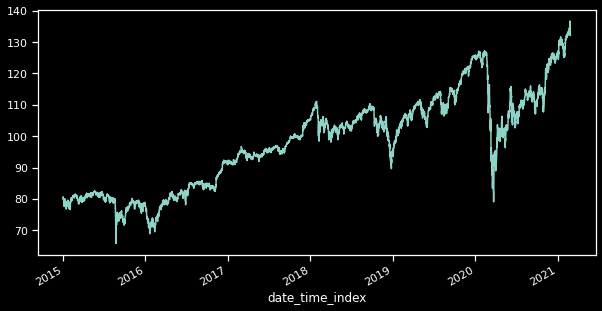

In [273]:
## Reducing dataset to 2015-02-2021
raw_stock_df = raw_stock_df.loc['2015':'02-2021']
raw_stock_df['BidClose'].plot();

In [274]:
## Taking smaller subset of data and renaming price
stock_df = raw_stock_df[['Date','Time','datetime','BidOpen']].copy()
stock_df = stock_df.rename({'BidOpen':'Price',
                           'datetime':'TradingHour'},axis=1)
stock_df

Date   Time          TradingHour   Price
date_time_index                                                    
2015-01-01 09:30:00  12/31/2014  15:30  2014-12-31 15:30:00   80.69
2015-01-01 10:30:00  12/31/2014  15:30  2014-12-31 15:30:00   80.69
2015-01-01 11:30:00  12/31/2014  15:30  2014-12-31 15:30:00   80.69
2015-01-01 12:30:00  12/31/2014  15:30  2014-12-31 15:30:00   80.69
2015-01-01 13:30:00  12/31/2014  15:30  2014-12-31 15:30:00   80.69
...                         ...    ...                  ...     ...
2021-02-26 11:30:00  02/26/2021  11:30  2021-02-26 11:30:00  132.86
2021-02-26 12:30:00  02/26/2021  11:30  2021-02-26 11:30:00  132.86
2021-02-26 13:30:00  02/26/2021  13:30  2021-02-26 13:30:00  133.54
2021-02-26 14:30:00  02/26/2021  14:30  2021-02-26 14:30:00  132.66
2021-02-26 15:30:00  02/26/2021  15:30  2021-02-26 15:30:00  132.97

[11249 rows x 4 columns]

In [275]:
ji.index_report(stock_df)

------------------------------------------------------------
	INDEX REPORT:	
------------------------------------------------------------
* Index Endpoints:
	2015-01-01 09:30:00 -- to -- 2021-02-26 15:30:00
* Index Freq:
	<CustomBusinessHour: CBH=09:30-16:30>


In [276]:
fig = ji.plotly_time_series(stock_df,x_col='TradingHour',
                            y_col='Price',as_figure=True)


In [277]:
# ihelp_menu([ji.train_test_split_by_last_days,
#            ji.make_scaler_library,
#            ji.transform_cols_from_library,
#            ji.make_train_test_series_gens])

# Model Type 1: Using Price to predict Price

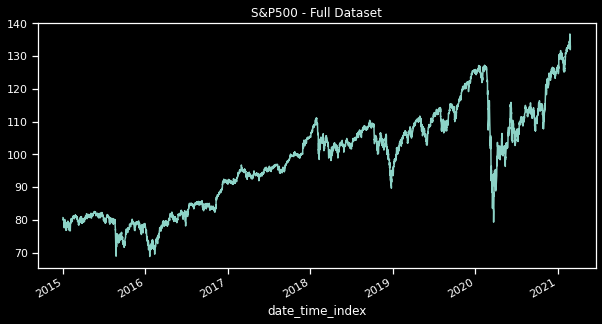

In [278]:
ts = stock_df['Price'].copy()
ts.plot(title='S&P500 - Full Dataset');

In [279]:
import statsmodels.tsa.api as tsa

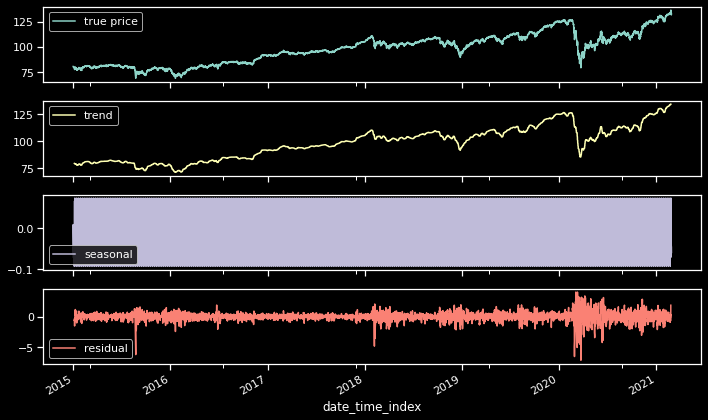

true price  trend  seasonal  residual
date_time_index                                           
2015-01-01 09:30:00       80.69    NaN -0.070380       NaN
2015-01-01 10:30:00       80.69    NaN -0.015254       NaN
2015-01-01 11:30:00       80.69    NaN -0.004710       NaN
2015-01-01 12:30:00       80.69    NaN  0.008645       NaN
2015-01-01 13:30:00       80.69    NaN -0.002649       NaN
...                         ...    ...       ...       ...
2021-02-26 11:30:00      132.86    NaN -0.049649       NaN
2021-02-26 12:30:00      132.86    NaN -0.058482       NaN
2021-02-26 13:30:00      133.54    NaN -0.055864       NaN
2021-02-26 14:30:00      132.66    NaN -0.060723       NaN
2021-02-26 15:30:00      132.97    NaN -0.046197       NaN

[11249 rows x 4 columns]

In [280]:
def decompose_ts(ts, freq=35, seas_decomp_kws={},plot=True,
                figsize=(10,6)):
    decomp = tsa.seasonal_decompose(ts,freq=freq,**seas_decomp_kws);#35=1 business week
    df_decomp = pd.DataFrame({'true price':decomp.observed,
                             'trend':decomp.trend,
                             'seasonal':decomp.seasonal,
                             'residual':decomp.resid})
    
    if plot: 
        axes = df_decomp.plot(subplots=True)
        fig=axes[0].get_figure()
        fig.set_size_inches(figsize)
        fig.tight_layout();
        plt.show()
    return df_decomp


df_decomp = decompose_ts(ts)
df_decomp

In [281]:
def iplot_decomp(df_decomp,stats=False):

    # Plotly Plot of Result
    my_layout = ji.def_cufflinks_solar_theme()#def_my_layout_solar_theme()
    
    df_decomp.iplot(asDates=True,subplots=True,shape=(4,1), 
                    layout=my_layout,shared_xaxes=True,
                    title="Seasonal Decomposition",)
    
    if stats:
        # Get ADF Stationarity Check for all components
        for col in df_decomp.columns:
            print('---'*20)
            print(f"Column: {col}")
            print('---'*10)
            ji.adf_test(df_decomp[col])
            print('---'*20,'\n')
        
iplot_decomp(df_decomp)

### Train Test Split 

In [282]:
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(stock_df,ji.custom_BH_freq())
periods_per_day

7

X_window size = 7 -- (1 day(s) * 7 rows/day)

training dates:	2018-09-17 09:30:00 	 2021-01-01 15:30:00 = 4200 rows
test dates:	2021-01-01 15:30:00 	 2021-02-26 14:30:00 = 280 rows


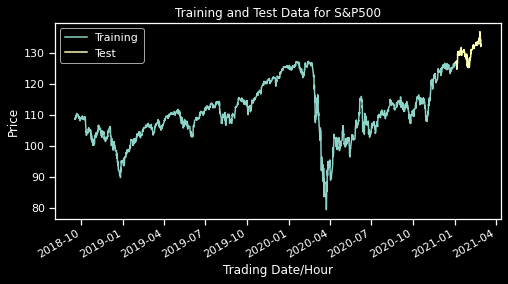

In [283]:
## SPECIFY # OF TRAINING TEST DAYS 
num_test_days=40
num_train_days= 600
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window

print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,plot_col='Price',
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, plot=True, iplot=False)

## Model 1.1: SARIMAX

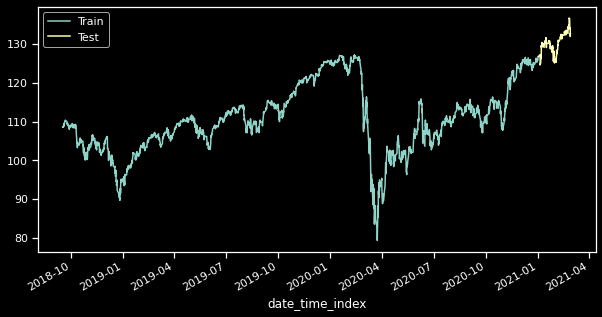

In [284]:
## taking single series for modeling
ts_train = df_train["Price"].copy()
ts_test = df_test["Price"].copy()

ax = ts_train.plot(label='Train')
ts_test.plot(label='Test')
ax.legend();

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results       -1.829098          31                    4168   

                    p-value  p<.05  Stationary?  
AD Fuller Results  0.366114  False        False

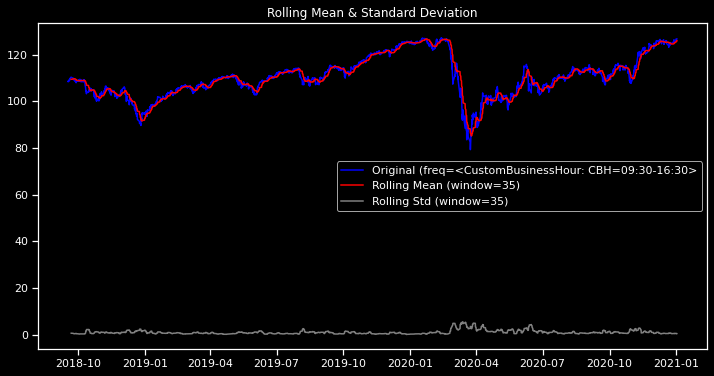

Test Statistic  #Lags Used  # of Observations Used  \
AD Fuller Results       -1.829098          31                    4168   

                    p-value  p<.05  Stationary?  
AD Fuller Results  0.366114  False        False

In [285]:
bs.ts.stationarity_check(ts_train,window=35)
# bs.ts.adfuller_test_df(ts_train)

### Pyramind ARIMA GridSearch 

#### **Using `pmdarima` to grid search for best ARIMA model type and orders**

- Using `auto_arima` from `pmdarima`

- SARIMA involves multiple sets of hyperparameters:
    - For base model: a set of p,d,q parameters
    - For seasonal model:a set of P,D,Q for the seasonal components.
    - m = the number of time periods to include in the season 
    
- Set start and max values for each parameter
    - i.e. `start_p=0, max_p = 10`
- For seasonal data, setting `m` indicates how many periods should be considered part of the season.


- **Below is from ["Predicitng the Sotck Market Using Machine Learning and Deep Learning."](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/):**
> Below are the steps you should follow for implementing auto ARIMA:
    1. Load the data: This step will be the same. Load the data into your notebook
    2. Preprocessing data: The input should be univariate, hence drop the other columns
    3. Fit Auto ARIMA: Fit the model on the univariate series
    4. Predict values on validation set: Make predictions on the validation set
    5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values


## Pyramind ARIMA GridSearch 
#### **Using `pmdarima` to grid search for best ARIMA model type and orders**

- Using `auto_arima` from `pmdarima`

- SARIMA involves multiple sets of hyperparameters:
    - For base model: a set of p,d,q parameters
    - For seasonal model:a set of P,D,Q for the seasonal components.
    - m = the number of time periods to include in the season 
    
- Set start and max values for each parameter
    - i.e. `start_p=0, max_p = 10`
- For seasonal data, setting `m` indicates how many periods should be considered part of the season.


- **Below is from ["Predicitng the Sotck Market Using Machine Learning and Deep Learning."](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/):**
> Below are the steps you should follow for implementing auto ARIMA:
    1. Load the data: This step will be the same. Load the data into your notebook
    2. Preprocessing data: The input should be univariate, hence drop the other columns
    3. Fit Auto ARIMA: Fit the model on the univariate series
    4. Predict values on validation set: Make predictions on the validation set
    5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values

In [286]:
from pmdarima.arima import auto_arima


In [287]:
## PREPARE DATA FOR PMD_ARIMA
arima_model_params={}
arima_model_params['data_params'] = ji.def_data_params(df_decomp,
                                                 num_test_days=10, num_train_days=365, 
                                                 days_for_x_window=1, verbose=0)
arima_model_params

{'data_params': {'num_test_days': 10,
  'num_train_days': 365,
  'days_for_x_window': 1,
  'periods_per_day': 7,
  'x_window': 7}}

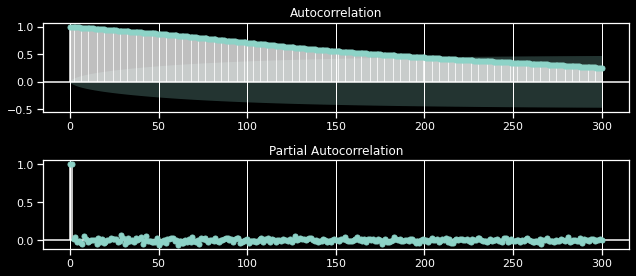

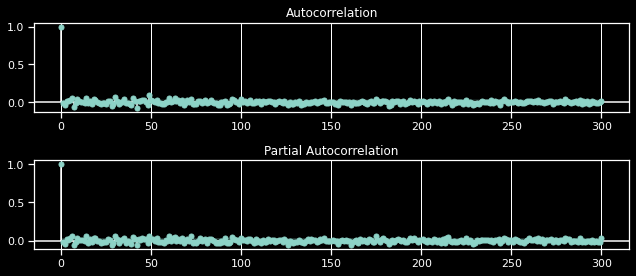

In [288]:
bs.ts.plot_acf_pacf(ts_train,figsize=(9,4),lags=300);
bs.ts.plot_acf_pacf(ts_train.diff().dropna(),figsize=(9,4),lags=300);

In [289]:
# ###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
# # dp = arima_model_params['data_params']
# df_train, df_test = ji.train_test_split_by_last_days(df_decomp,
#                                                      periods_per_day = dp['periods_per_day'], 
#                                                      num_test_days   =  dp['num_test_days'],
#                                                      num_train_days  =  dp['num_train_days'],
#                                                      verbose=0,plot_col='true price', iplot=True)

# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test'))

In [330]:
ts_train

date_time_index
2018-09-17 09:30:00    108.53
2018-09-17 10:30:00    108.80
2018-09-17 11:30:00    108.80
2018-09-17 12:30:00    108.70
2018-09-17 13:30:00    108.70
                        ...  
2021-01-01 11:30:00    126.79
2021-01-01 12:30:00    126.79
2021-01-01 13:30:00    126.79
2021-01-01 14:30:00    126.79
2021-01-01 15:30:00    126.79
Freq: CBH, Name: Price, Length: 4200, dtype: float64

In [332]:
## RUN AUTO ARIMA GRID SEARCH
auto_arima_clock = bs.Clock()
auto_arima_clock.tic()

auto_model = auto_arima(ts_train, 
                        start_p=0, max_p=14,
                        start_q=0, max_q=14,
                        d=1,max_d=7,
                        max_order=50,
                        seasonal=True,
                        m=7,
                        start_P=0,
                        start_Q=0,
                        D=1,
#                         max_iter=50,
                        verbose=True,
                        trace=True,)

display(auto_model.summary())



--- CLOCK STARTED @:    06/19/21 - 05:05:19 PM --- 
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=10062.342, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=8511.912, Time=2.34 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=3.59 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=10059.923, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8061.413, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=15.04 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=7.59 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=8059.494, Time=0.82 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=8510.384, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=10.65 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=4.00 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=8061.403, Time=1.60 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=8061.561, Time=3.68 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=8061.494, Time=3.33 sec

B

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 4200
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -4026.747
Date:                           Sat, 19 Jun 2021   AIC                           8059.494
Time:                                   17:06:14   BIC                           8078.517
Sample:                                        0   HQIC                          8066.221
                                          - 4200                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.7343      0.004   -164.025      0.000      -0.743      -0.725
ar.S.L14      -0.3195      0.004    -76.837      0.000      -0.328      -0.311
sigma2         0.3994      0.003    145.706      0.000       0.394       0.405
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             71600.37
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 4200
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -4026.747
Date:                           Sat, 19 Jun 2021   AIC                           8059.494
Time:                                   17:06:16   BIC                           8078.517
Sample:                               09-17-2018   HQIC                          8066.221
                                    - 01-01-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.7343      0.004   -164.025      0.000      -0.743      -0.725
ar.S.L14      -0.3195      0.004    -76.837      0.000      -0.328      -0.311
sigma2         0.3994      0.003    145.706      0.000       0.394       0.405
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             71600.37
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.78   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

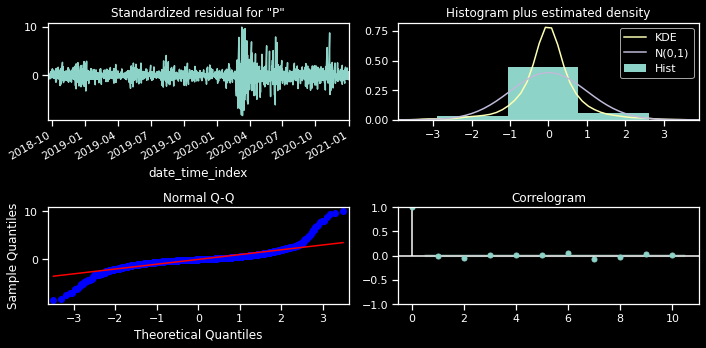

In [333]:
## Fit a final model and evaluate
best_model = tsa.SARIMAX(ts_train,order=auto_model.order,
                seasonal_order = auto_model.seasonal_order,
                enforce_invertibility=False).fit()


## Display Summary + Diagnostics
display(best_model.summary())
best_model.plot_diagnostics();
plt.tight_layout()

[i] Using length of ts_test instead of future_steps


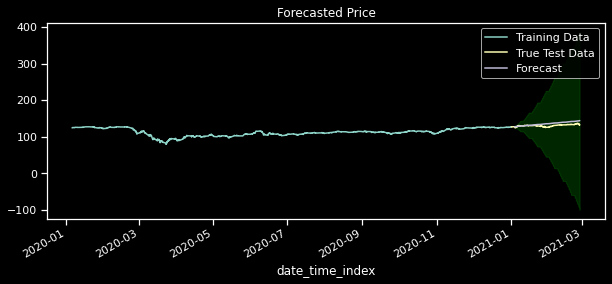

In [334]:
bs.ts.plot_forecast(best_model,ts_train=ts_train,
                   ts_test=ts_test);

(<Figure size 720x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'One-Step-Ahead Predictions for  Price'}, xlabel='date_time_index'>,
        <AxesSubplot:title={'center':'Comparing Just Predicted Time Steps'}, xlabel='Time Step #', ylabel='Values'>],
       dtype=object))

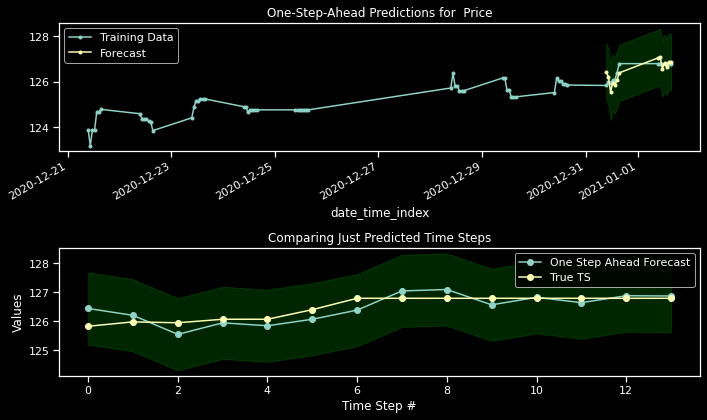

In [362]:
bs.ts.plot_one_step_ahead_prediction(best_model,ts_train=ts_train,
                                     last_n_lags=70,pred_steps=14,
                                    )

In [363]:
# ## Get PReds to plot with JUST pred period
# steps = 14
# pred_df = bs.ts.get_one_step_ahead_pred(best_model,pred_steps=steps)
# pred_df['True TS'] = ts_train.iloc[-steps:]
# pred_df.reset_index(drop=False,inplace=True)
# pred_df

In [364]:
# ax = pred_df[["One Step Ahead Forecast","True TS"]].plot(marker='o')
# ax.fill_between(pred_df.index,
#                 pred_df['Lower CI'], 
#                 pred_df['Upper CI'],color='g',alpha=0.3)
# ax.set(ylabel='Values',xlabel='Time Step #')

# BOOKMARK 06/19

## Model 1: LSTMs

In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window
n_features = 1 # just stock Price

print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model1 = Sequential()
model1.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
#     model.add(Dropout(0.2))
model1.add(LSTM(units=50, activation='relu'))
model1.add(Dense(1))

model1.compile(loss=ji.my_rmse, metrics=['acc'],
              optimizer=optimizers.Nadam())

display(model1.summary())


In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model1.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)


clock.toc('')


model_key = "model_1"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model1,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model1 = ji.get_model_preds_df(model1, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  preds_from_train_preds = True, 
                                  preds_from_test_preds = True,
                                  iplot = True,
                                  verbose=0)
#                                   subplot_mode='lines+markers')
    
# Get evaluation metrics
df_results1, dfs_results1, df_shifted1 =\
ji.compare_eval_metrics_for_shifts(df_model1['true_test_price'],
                                   df_model1['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model1['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
reload(ji)
save_model=True
ji.save_model_dfs(file_dict, 'model_1',df_model1,dfs_results1,df_shifted1)

filename_prefix = file_dict['model_1']['base_filename']
if save_model ==True:
    model_1_output_files = ji.save_model_weights_params(model1,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 1 Summary

# Model Type 2: Stock Price + Technical Indicators

## Calculating Technical Indicators

### Technical Indicator Details
- https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb
- https://blog.quantinsti.com/build-technical-indicators-in-python/

1. **7 and 21 day moving averages**
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
2. **MACD(Moving Average Convergence Divergence)**

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
3. **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

4. **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


5. **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $ V $ = Latest Price
        - $ V_x $ = Closing Price
        - $ x $ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```

In [ ]:
## Full Preprocessing code 
fname = 'data/ive_minute_tick_bidask_API_2021_06-18-21.csv.gz'
raw_stock_df = ji.load_raw_stock_data_from_txt(fname,
                                               verbose=2)

stock_df = ji.get_technical_indicators(raw_stock_df,make_price_from='BidClose')

## Get list of new tech indicator columns
indicator_cols = [c for c in stock_df.columns if c not in raw_stock_df.columns]
display(stock_df.head())
indicator_cols

In [ ]:
# SELECT DESIRED COLUMNS
stock_df = stock_df[[
    'price','ma7','ma21','26ema','12ema','MACD','20sd',
    'upper_band','lower_band','ema','momentum']]

# Make stock_price for twitter functions
stock_df.dropna(inplace=True)
ji.index_report(stock_df)
display(stock_df.head(3))

In [ ]:
fig =ji.plotly_technical_indicators(stock_df)

In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=10
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=5

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq( stock_df, ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(stock_df,
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)



In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens( 
    df_train['price'], df_test['price'], 
    x_window=x_window,n_features=1,batch_size=1, verbose=0)

In [ ]:
## Make new time series generators with all stock_indicators for X_sequences
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
# Create keras model from model_params
# import functions_combined_BEST as ji
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input = x_window #model_params['input_params']['n_input']
n_features = len(df_train.columns) # model_params['input_params']['n_features']

print(f'input shape: ({n_input},{n_features}')
input_shape=(n_input, n_features)

# Create model architecture
model2 = Sequential()
model2.add(LSTM(units=50, input_shape =input_shape,return_sequences=True))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
# model2.add(Dropout(0.2))
model2.add(LSTM(units=50, activation='relu'))
model2.add(Dense(1))

model2.compile(loss=ji.my_rmse, metrics=['acc',ji.my_rmse],
              optimizer=optimizers.Nadam())

display(model2.summary())

In [ ]:
epochs=5

clock = bs.Clock()
print('---'*20)
print('\tFITTING MODEL:')
print('---'*20,'\n')     

# start the timer
clock.tic('')

# Fit the model
history = model2.fit_generator(train_generator,epochs=epochs) 
clock.toc('')

model_key = "model_2"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model2,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model2 = ji.get_model_preds_df(model2, 
                                  test_generator=test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  x_window=x_window,
                                  n_features=len(df_train.columns),
                                  scaler=scaler_library['price'],
                                  preds_from_gen=True, 
                                  inverse_tf=True,
                                  iplot=True)

# Compare predictions if predictions timebins shifted
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

In [ ]:
##SAVING DFS
ji.save_model_dfs(file_dict,'model_2',
               df_model=df_model2,
              df_results=dfs_results2,
              df_shifted=df_shifted2)

In [ ]:
df_results2, dfs_results2, df_shifted2 =\
ji.compare_eval_metrics_for_shifts(df_model2['true_test_price'],
                                   df_model2['pred_from_gen'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_model2['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)

### Model 2: Summary

# COMBINING TWEET STATS, NLP CLASSIFICATION, AND MARKET DATA

1. Load up stock data in CBH form
2. Load up twitter data without NLP
3. Create time_interval_bins ...
    - from *stock CBH* time index
4. Check twitter_df for any tweets from 1_hour prior
5. Extract the 'content' column and retweet/fav counts 


    

In [ ]:
file_dict=ji.def_filename_dictionary(load_prior=False,save_directory=True)

In [ ]:
# LOAD IN FULL STOCK DATASET using ClosingBig S&P500 WITH INDEX.FREQ=CBH
fname = file_dict['stock_df']['stock_df_with_indicators']
full_df = ji.load_processed_stock_data(processed_data_filename=fname)

# SELECT DESIRED COLUMNS
stock_df = full_df[[
    'price','ma7','ma21','26ema','12ema','MACD',
    '20sd','upper_band','lower_band','ema','momentum'
]]

stock_df.head()

stock_df['date_time'] = stock_df.index.to_series()
ji.index_report(stock_df)

stock_df.sort_index(inplace=True)
display(stock_df.head(2),stock_df.tail(2))
del full_df

In [ ]:
## LOAD IN RAW TWITTER DATA, NO PROCESSING
twitter_df= ji.load_raw_twitter_file(filename='data/trumptwitterarchive_export_iphone_only__08_23_2019.csv',
                                     date_as_index=True,
                                     rename_map={'text': 'content', 'created_at': 'date'})
twitter_df = ji.check_twitter_df(twitter_df,text_col='content',remove_duplicates=True, remove_long_strings=True)


In [ ]:
# MAKE TIME INTERVALS BASED ON BUSINESS HOUR START (09:30-10:30)
clock = bs.Clock(verbose=1)
clock.tic()

time_intervals= \
ji.make_time_index_intervals(stock_df,
                             col='date_time', 
                             closed='right',
                             return_interval_dicts=False) 
clock.lap('time_intervals created.')


## USE THE TIME INDEX TO FILTER OUT TWEETS FROM THE HOUR PRIOR
twitter_df, bin_codes = ji.bin_df_by_date_intervals(twitter_df ,time_intervals)
stock_df, bin_codes_stock = ji.bin_df_by_date_intervals(stock_df, time_intervals, column='date_time')

clock.lap('bins added to dataframes')
# display(twitter_df.head(2), stock_df.head(2))

## COLLAPSE DFs BY CODED BINS
twitter_grouped = ji.collapse_df_by_group_index_col(twitter_df,
                                                    group_index_col='int_bins',
                                                    drop_orig=True,
                                                    verbose=0)

stocks_grouped = ji.collapse_df_by_group_index_col(stock_df,
                                                    drop_orig=True,
                                                    group_index_col='int_bins', 
                                                  verbose=0)

clock.toc('collapsed dfs to _grouped')
display(twitter_grouped.head(3),stocks_grouped.head(3))

In [ ]:
ihelp_menu(ji.merge_stocks_and_tweets)

In [ ]:
## STOCKS AND TWEETS 
df_combined = ji.merge_stocks_and_tweets(stocks_grouped, 
                                      twitter_grouped,
                                      on='int_bins',how='left',
                                      show_summary=True)

In [ ]:
ji.column_report(df_combined)

In [ ]:
## Check for and address new null values
ji.check_null_small(df_combined);
cols_to_fill_zeros = ['num_tweets','total_retweet_count','total_favorite_count']
for col in cols_to_fill_zeros:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null,col] = 0

cols_to_fill_blank_str = ['group_content','source','tweet_times','is_retweet']
for col in cols_to_fill_blank_str:
    idx_null = ji.find_null_idx(df_combined, column=col)
    df_combined.loc[idx_null, col] = ""
ji.check_null_small(df_combined);

In [ ]:
ji.dict_dropdown(file_dict)

fname = file_dict['df_combined']['pre_nlp']
df_combined.to_csv(fname)
print(fname)

In [ ]:
## Add nlp
df_nlp = ji.full_twitter_df_processing(df_combined,'group_content',force=True)
ji.column_report(df_nlp, as_qgrid=True)

In [ ]:
df_nlp.head()

In [ ]:
## Use case ratio null values as index to replace values
idx_null= ji.check_null_small(df_nlp,null_index_column='case_ratio')
df_nlp.loc[idx_null,'case_ratio'] = 0.0
ji.check_null_small(df_nlp)

## replace sentiment_class, set =-1
cols_to_replace_misleading_values = ['sentiment_class']
for col in cols_to_replace_misleading_values:
    df_nlp.loc[idx_null,col] = -1

## remap sentiment class
sent_class_mapper = {'neg':0,
                     -1:1,
                    'pos':2}
df_nlp['sentiment_class'] = df_nlp['sentiment_class'].apply(lambda x: sent_class_mapper[x])

bool_cols_to_ints = ['has_tweets']
for col in bool_cols_to_ints:
    df_nlp[col] = df_nlp[col].apply(lambda x: 1 if x==True else 0)
    

In [ ]:
df_nlp.head()

In [ ]:
ji.display_same_tweet_diff_cols(df_nlp.groupby('has_tweets').get_group(True),
                                columns=['group_content','content_min_clean','cleaned_stopped_lemmas'],as_md=True)

In [ ]:
ji.check_twitter_df(df_nlp,char_limit=61*350)
# get_floats = df_nlp['content_min_clean'].apply(lambda x: isinstance(x,float))


In [ ]:
fname =file_dict['df_combined']['post_nlp']
df_nlp.to_csv(fname)
print(f'saved to {fname}')

### Loading in NLP Model for Predictions

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
def get_most_recent_filenames(full_filename,str_to_find=None):
    import os
    import time
    fparts = full_filename.split('/')
    folder = '/'.join(fparts[0:-1])
    name = fparts[-1]
    
    filelist = os.listdir(folder)

    mtimes = [['file','date modified']]
    for file in filelist:
        if str_to_find is None:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
        elif str_to_find in file:
            mtimes.append([file, time.ctime(os.path.getmtime(folder+'/'+file))])
    res = bs.list2df(mtimes)
    res['date modified'] = pd.to_datetime(res['date modified'])
    res.set_index('date modified',inplace=True)
    res.sort_index(ascending=False, inplace=True)
    
    most_recent = res.iloc[0]
    import re
    re.compile(r'()')
    
    return    res

In [ ]:
res = get_most_recent_filenames(file_dict['model_0A']['base_filename'])
res.iloc[0:10]

In [ ]:
reload(ji)

In [ ]:
## Load the nlp model and weights with layers set trainable=False
base_fname = file_dict['nlp_model_for_predictions']['base_filename']
nlp_model,df_model_layers =  ji.load_model_weights_params(base_filename= base_fname,#'models/NLP/nlp_model0B__09-02-2019_0121pm',
                                        load_model_params=False,
                                        load_model_layers_excel=True,
                                        trainable=False)
## Load in Word2Vec model from earlier
w2v_model = io.load_word2vec(file_dict=file_dict)

### Get Predictions for Hour-Binned Tweets

In [ ]:
ihelp_menu([ji.get_tokenizer_and_text_sequences,
           ji.replace_embedding_layer])

In [ ]:
ji.column_report(df_nlp)

In [ ]:
## GET X_SEQUENES FOR BINNED TWEETS AND CREATE NEW EMBEDDING LAYER FOR THEIR SIZE
reload(ji)
text_data=df_nlp['cleaned_stopped_lemmas']
tokenizer, X_sequences = ji.get_tokenizer_and_text_sequences(w2v_model,text_data)

new_nlp_model = ji.replace_embedding_layer(nlp_model,w2v_model,text_data,verbose=2)
new_nlp_model.summary()

In [ ]:
## GET PREDICTIONS FROM NEW MODEL
preds = new_nlp_model.predict_classes(X_sequences)
print(type(preds), preds.shape)
ji.check_y_class_balance(preds)

In [ ]:
## add to df
df_nlp['pred_classes_int'] = preds
mapper= {0:'neg',
        1:'no_change',
        2:'pos'}
df_nlp['pred_classes'] = df_nlp['pred_classes_int'].apply(lambda x: mapper[x])
display(df_nlp.head())

In [ ]:
ji.dict_dropdown(file_dict)

In [ ]:
# fname = file_dict['df_combined']['with_preds']

# df_nlp.to_csv(fname)
# print(fname)

## Model 3: Stock Price + Indicators + NLP Preds & Tweet Features

In [58]:
# ## IMPORT CUSTOM CAPSTONE FUNCTIONS
# import functions_combined_BEST as ji
# import functions_io as io

# from functions_combined_BEST import ihelp, ihelp_menu,\
# reload, inspect_variables

# ## IMPORT MY PUBLISHED PYPI PACKAGE 
# import bs_ds as  bs
# from bs_ds.imports import *

# ## IMPORT CONVENIENCE FUNCTIONS
# from pprint import pprint
# import qgrid
# import json

# # Import plotly and cufflinks for iplots
# import plotly
# import plotly.express as px
# import plotly.io as pio
# pio

# import cufflinks as cf
# from plotly import graph_objs as go
# from plotly.offline import iplot
# cf.go_offline()

# # Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

# #Set pd.set_options for tweet visibility
# pd.set_option('display.max_colwidth',100)
# pd.set_option('display.max_columns',50)

# file_dict = io.def_filename_dictionary(load_prior=False, save_directory=True)
# # file_dict = ji.load_filename_directory()

ModuleNotFoundError: No module named 'functions_combined_BEST'

In [ ]:
df_combined = pd.read_csv('data/__combined_stock_data_with_tweet_preds.csv', index_col=0,parse_dates=True)
df_combined.head()

### Finalize colums for final model

In [ ]:
model_col_list = ['price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band','lower_band', 'ema', 'momentum',
                  'has_tweets','num_tweets','case_ratio', 'compound_score','pos','neu','neg','sentiment_class',
                  'pred_classes','pred_classes_int','total_favorite_count','total_retweet_count']

df_combined = ji.set_timeindex_freq(df_combined,fill_nulls=False)

df_to_model = df_combined[model_col_list].copy()#df_nlp[model_col_list].copy()
# df_to_model.to_csv('data/_df_to_model_final_model.csv')
df_to_model.head()

In [ ]:
# del_me= ['X_sequences','df_nlp','twitter_grouped','bin_codes_stock','bin_codes']#list of variable names
# for me in del_me:    
#     try: 
#         exec(f'del {me}')
#         print(f'del {me} succeeded')
#     except:
#         print(f'del {me} succeeded')
#         continue
# ji.inspect_variables(locals())


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=5
num_train_days=260
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)



In [ ]:
###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))

# Show transformed dataset
# display( df_train.head(2).round(3).style.set_caption('training data - scaled'))

# Create timeseries generators
train_generator, test_generator = ji.make_train_test_series_gens(
    train_data_series=df_train,
    test_data_series=df_test,
    y_cols='price',
    x_window=x_window,
    n_features=len(df_train.columns),
    batch_size=1, verbose=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout
from IPython.display import display
from tensorflow.keras.regularizers import l2

# Specifying input shape (size of samples, rank of samples?)
n_input =x_window
n_features = len(df_train.columns)
print(f'input shape: ({n_input},{n_features})')
input_shape=(n_input, n_features)

# Create model architecture
model3 = Sequential()
model3.add(LSTM(units=100, input_shape =input_shape,return_sequences=True,dropout=0.3,recurrent_dropout=0.3))#,  kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01),
model3.add(LSTM(units=100, activation='relu', return_sequences=False,dropout=0.3,recurrent_dropout=0.3))
#     model.add(Dense(units=10, activation='relu'))
model3.add(Dense(1))#,activation='relu'))


model3.compile(loss=ji.my_rmse, metrics=['acc'],optimizer=optimizers.Nadam())
    
model3.summary()

In [ ]:
## FIT MODEL
dashes = '---'*20
print(f"{dashes}\n\tFITTING MODEL:\n{dashes}")

## set params
epochs=5

# override keras warnings
ji.quiet_mode(True,True,True)

# Instantiating clock timer
clock = bs.Clock()
clock.tic('')

# Fit the model
history = model3.fit_generator(train_generator,
                               epochs=epochs,
                               verbose=2, 
                               use_multiprocessing=True,
                               workers=3)
clock.toc('')

model_key = "model_3"
hist_fname = file_dict[model_key]['fig_keras_history.ext']
summary_fname = file_dict[model_key]['model_summary']

# eval_results = ji.evaluate_model_plot_history(model1, train_generator, test_generator)
ji.evaluate_regression_model(model3,history,
                             train_generator=train_generator,
                             test_generator=test_generator,
                            true_test_series=df_test['price'],
                            true_train_series =df_train['price'],
                             save_history=True,history_filename=hist_fname,
                             save_summary=True, summary_filename=summary_fname)

In [ ]:
### PREFER NEW WAY - GET DF_MODEL FIRST THEN GET EVALUATE_REGRESSION INFORMATION?
## Get true vs pred data as a dataframe and iplot
df_model3 = ji.get_model_preds_df(model3, 
                                  test_generator = test_generator,
                                  true_train_series = df_train['price'],
                                  true_test_series = df_test['price'],
                                  include_train_data=True,
                                  inverse_tf = True, 
                                  scaler = scaler_library['price'],
                                  preds_from_gen = True, 
                                  iplot = False,
                                  verbose=1)
#                                   subplot_mode='lines+markers')
ji.plotly_true_vs_preds_subplots(df_model3)
    
# Get evaluation metrics
df_results3, dfs_results3, df_shifted3 =\
ji.compare_eval_metrics_for_shifts(df_model3['true_test_price'],
                                   df_model3['pred_from_gen'],
                                   shift_list=np.arange(-4,4,1),
                                   true_train_series_to_add=df_model3['true_train_price'],
                                   display_results=True,
                                   display_U_info=True,
                                   return_results=True,
                                   return_styled_df=True,
                                   return_shifted_df=True)


save_model=True
ji.save_model_dfs(file_dict, 'model_3',df_model3,dfs_results3,df_shifted3)

In [ ]:
reload(ji)
filename_prefix = file_dict['model_3']['base_filename']
if save_model ==True:
    model_3_output_files = bs.save_model_weights_params(model3,
                                 filename_prefix=filename_prefix,
                                 auto_increment_name=True,
                                 auto_filename_suffix=True, 
                                 suffix_time_format='%m-%d-%y_%I%M%p',
                                 save_model_layer_config_xlsx=True)

### Model 3 Summary

## Model X: XGB Regression + Feature Importance


In [ ]:
## SPECIFY # OF TRAINING TEST DAYS 
reload(ji)
num_test_days=20
num_train_days=2*52*5
### SPECIFY Number of days included in each X_sequence (each prediction)
days_for_x_window=1

cols_to_exclude = ['pred_classes','has_tweets']
# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(df_to_model.drop(cols_to_exclude,axis=1), ji.custom_BH_freq() )


## Get the number of rows for x_window 
x_window = periods_per_day * days_for_x_window#data_params['days_for_x_window'] 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')

## Train-test-split by the # of days
df_train, df_test = ji.train_test_split_by_last_days(df_to_model.drop(cols_to_exclude,axis=1),
                                                     periods_per_day =periods_per_day, 
                                                     num_test_days   = num_test_days,
                                                     num_train_days  = num_train_days,
                                                     verbose=1, iplot=True)

###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
display(df_train.head(2).style.set_caption('df_train - pre-scaling'))

scaler_library, df_train = ji.make_scaler_library(df_train, transform=True, verbose=1)

df_test = ji.transform_cols_from_library(df_test, col_list=None,
                                         scaler_library=scaler_library,
                                         inverse=False)
display(df_train.head(2).style.set_caption('df_train - post-scaling'))


In [ ]:
## Shift price values such that the y-value being predicted is the following hour's Closing Price
df_train['price_shifted'] = df_train['price'].shift(-1)
df_test['price_shifted'] = df_test['price'].shift(-1)

display(df_train[['price','price_shifted','momentum','ema','num_tweets',]].head(10))

# Drop the couple of null values created by the shift
df_train.dropna(subset=['price_shifted'], inplace=True)
df_test.dropna(subset=['price_shifted'], inplace=True)

## Drop columns and make train-test-X and y
target_col = 'price_shifted'
drop_cols = ['price_shifted','price']

X_train = df_train.drop(drop_cols,axis=1)
y_train = df_train[target_col]
X_test = df_test.drop(drop_cols,axis=1)
y_test = df_test[target_col]

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = xgb.XGBRegressor(n_estimators=1000,silent=False,max_depth=4)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)


## Get Predictions
pred_price = reg.predict(X_test)
pred_price_series = pd.Series(pred_price,index=df_test.index,name='pred_test_price')#.plot()
df_xgb = pd.concat([df_train['price'].rename('true_train_price'), pred_price_series,df_test['price'].rename('true_test_price')],axis=1)


df_results = ji.evaluate_regression(df_test['price'], pred_price_series,show_results=True);


fig = ji.plotly_true_vs_preds_subplots(df_xgb,true_train_col='true_train_price',
                                true_test_col='true_test_price',
                                pred_test_columns='pred_test_price')


## PLOT FEATURE IMPORTANCE
feature_importance={}
for import_type in ['weight','gain','cover']:
    reg.importance_type = import_type
    cur_importances = reg.feature_importances_
    feature_importance[import_type] = pd.Series(data = cur_importances,
                                               index=df_train.drop(drop_cols,axis=1).columns,
                                               name=import_type)

df_importance = pd.DataFrame(feature_importance)
    
importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
                                                                    title='Feature Importance',
                                                                    xTitle='Relative Importance<br>(sum=1.0)',
                                                                    asFigure=True)

iplot(importance_fig)

In [ ]:
# from plotly.offline import plot,iplot
# html_fig = plot(importance_fig,output_type='div')

# with open ('html_importance_fig.html','w') as f:
#     f.write(html_fig)

In [ ]:
# Compare predictions if predictions timebins shifted
df_resultsX, dfs_resultsX, df_shiftedX =\
ji.compare_eval_metrics_for_shifts(df_xgb['true_test_price'],
                                   df_xgb['pred_test_price'],
                                   shift_list=np.arange(-4,5,1),
                                   true_train_series_to_add=df_xgb['true_train_price'],
                                   display_results=True,
                                   return_styled_df=True,
                                   display_U_info=False,
                                   return_shifted_df=True,
                                   return_results=True)
df_importance.to_csv('results/modelxgb/df_importance.csv')

ji.save_model_dfs(file_dict, 'model_xgb',df_xgb,dfs_resultsX,df_shiftedX)

In [ ]:
tree_vis = xgb.to_graphviz(reg)#,**{'format':'svg'})

tree_vis.render("xgb_full_model_",format="pdf",)

### Model Interpretation

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_train)
shap_interaction_values = explainer.shap_interaction_values(X_train)

In [ ]:
shap.summary_plot(shap_interaction_values,X_train)

In [ ]:
shap.summary_plot(shap_values, features=X_train)

### Model X Summary

In [ ]:
# importance_fig = df_importance.sort_values(by='weight', ascending=True).iplot(kind='barh',theme='solar',
#                                                                     title='Feature Importance',
#                                                                     xTitle='Relative Importance<br>(sum=1.0)',
#                                                                     asFigure=True)

# iplot(importance_fig)

# Summary

In [ ]:
dfs_list = {'Model 1':dfs_results1,
            'Model 2':dfs_results2,
            'Model 3':dfs_results3,
            'XGB Regressor':dfs_resultsX}
for k,v in dfs_list.items():
    new_cap = f'Evaluation Metrics for {k}'
    display(v.set_caption(new_cap))
#     [display(x.set_cat) for x in dfs_list]